<a href="https://colab.research.google.com/github/RutujaJadhav/predict-admission-rate/blob/master/Predicting_grad_school_admission_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

tf.enable_eager_execution()

In [0]:
data = pd.read_csv('sample_data/Admission_Predict_Ver1.1.csv')


In [25]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [76]:
#header=['Serial No.','GRE Score'	,'TOEFL Score',	'University Rating',	'SOP',	'LOR'	,'CGPA',	'Research',	'Chance of Admit']

df = pd.DataFrame(data)

header = df.iloc[0]

df.describe()
list(df.columns.values)




['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

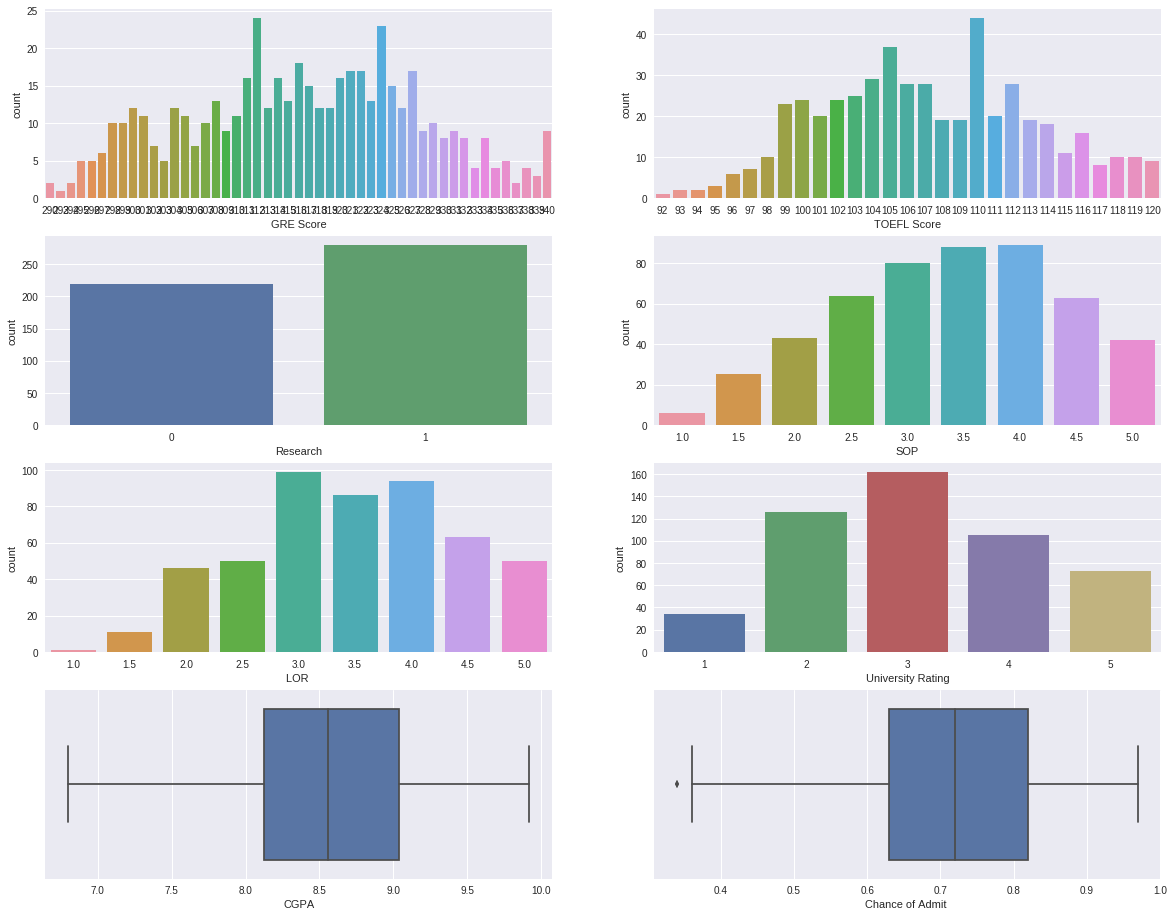

In [87]:
f,ax = plt.subplots(4,2,figsize=(20,16))
sns.countplot('GRE Score',data=df,ax=ax[0,0])
sns.countplot('TOEFL Score',data=df,ax=ax[0,1])
sns.countplot('Research',data=df,ax=ax[1,0])
sns.countplot('SOP',data=df,ax=ax[1,1])
sns.countplot('LOR ',data=df,ax=ax[2,0])
sns.countplot('University Rating',data=df,ax=ax[2,1])

sns.boxplot('CGPA',data=df,ax=ax[3,0])
sns.boxplot('Chance of Admit ',data=df,ax=ax[3,1])



In [141]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


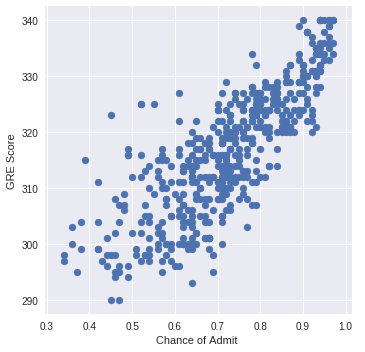

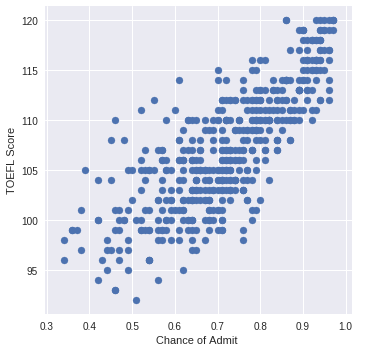

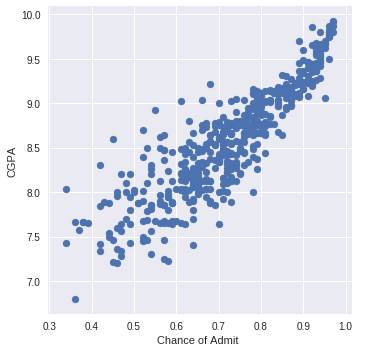

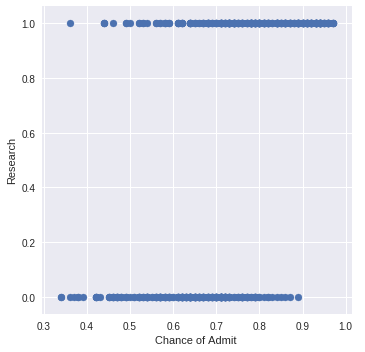

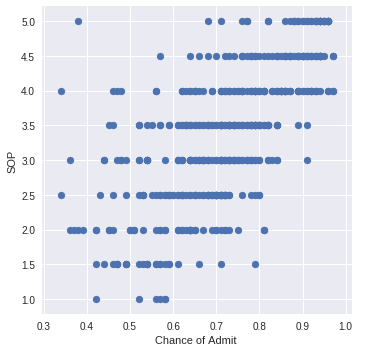

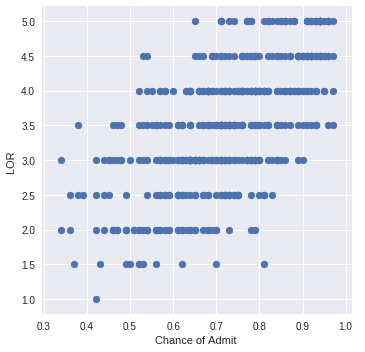

In [101]:

sns.FacetGrid(df,size=5) \
   .map(plt.scatter,"Chance of Admit ","GRE Score") \
   .add_legend()

sns.FacetGrid(df,size=5) \
   .map(plt.scatter,"Chance of Admit ","TOEFL Score") \
   .add_legend()

sns.FacetGrid(df,size=5) \
   .map(plt.scatter,"Chance of Admit ","CGPA") \
   .add_legend()

sns.FacetGrid(df,size=5) \
   .map(plt.scatter,"Chance of Admit ","Research") \
   .add_legend()

sns.FacetGrid(df,size=5) \
   .map(plt.scatter,"Chance of Admit ","SOP") \
   .add_legend()

sns.FacetGrid(df,size=5) \
   .map(plt.scatter,"Chance of Admit ","LOR ") \
   .add_legend()



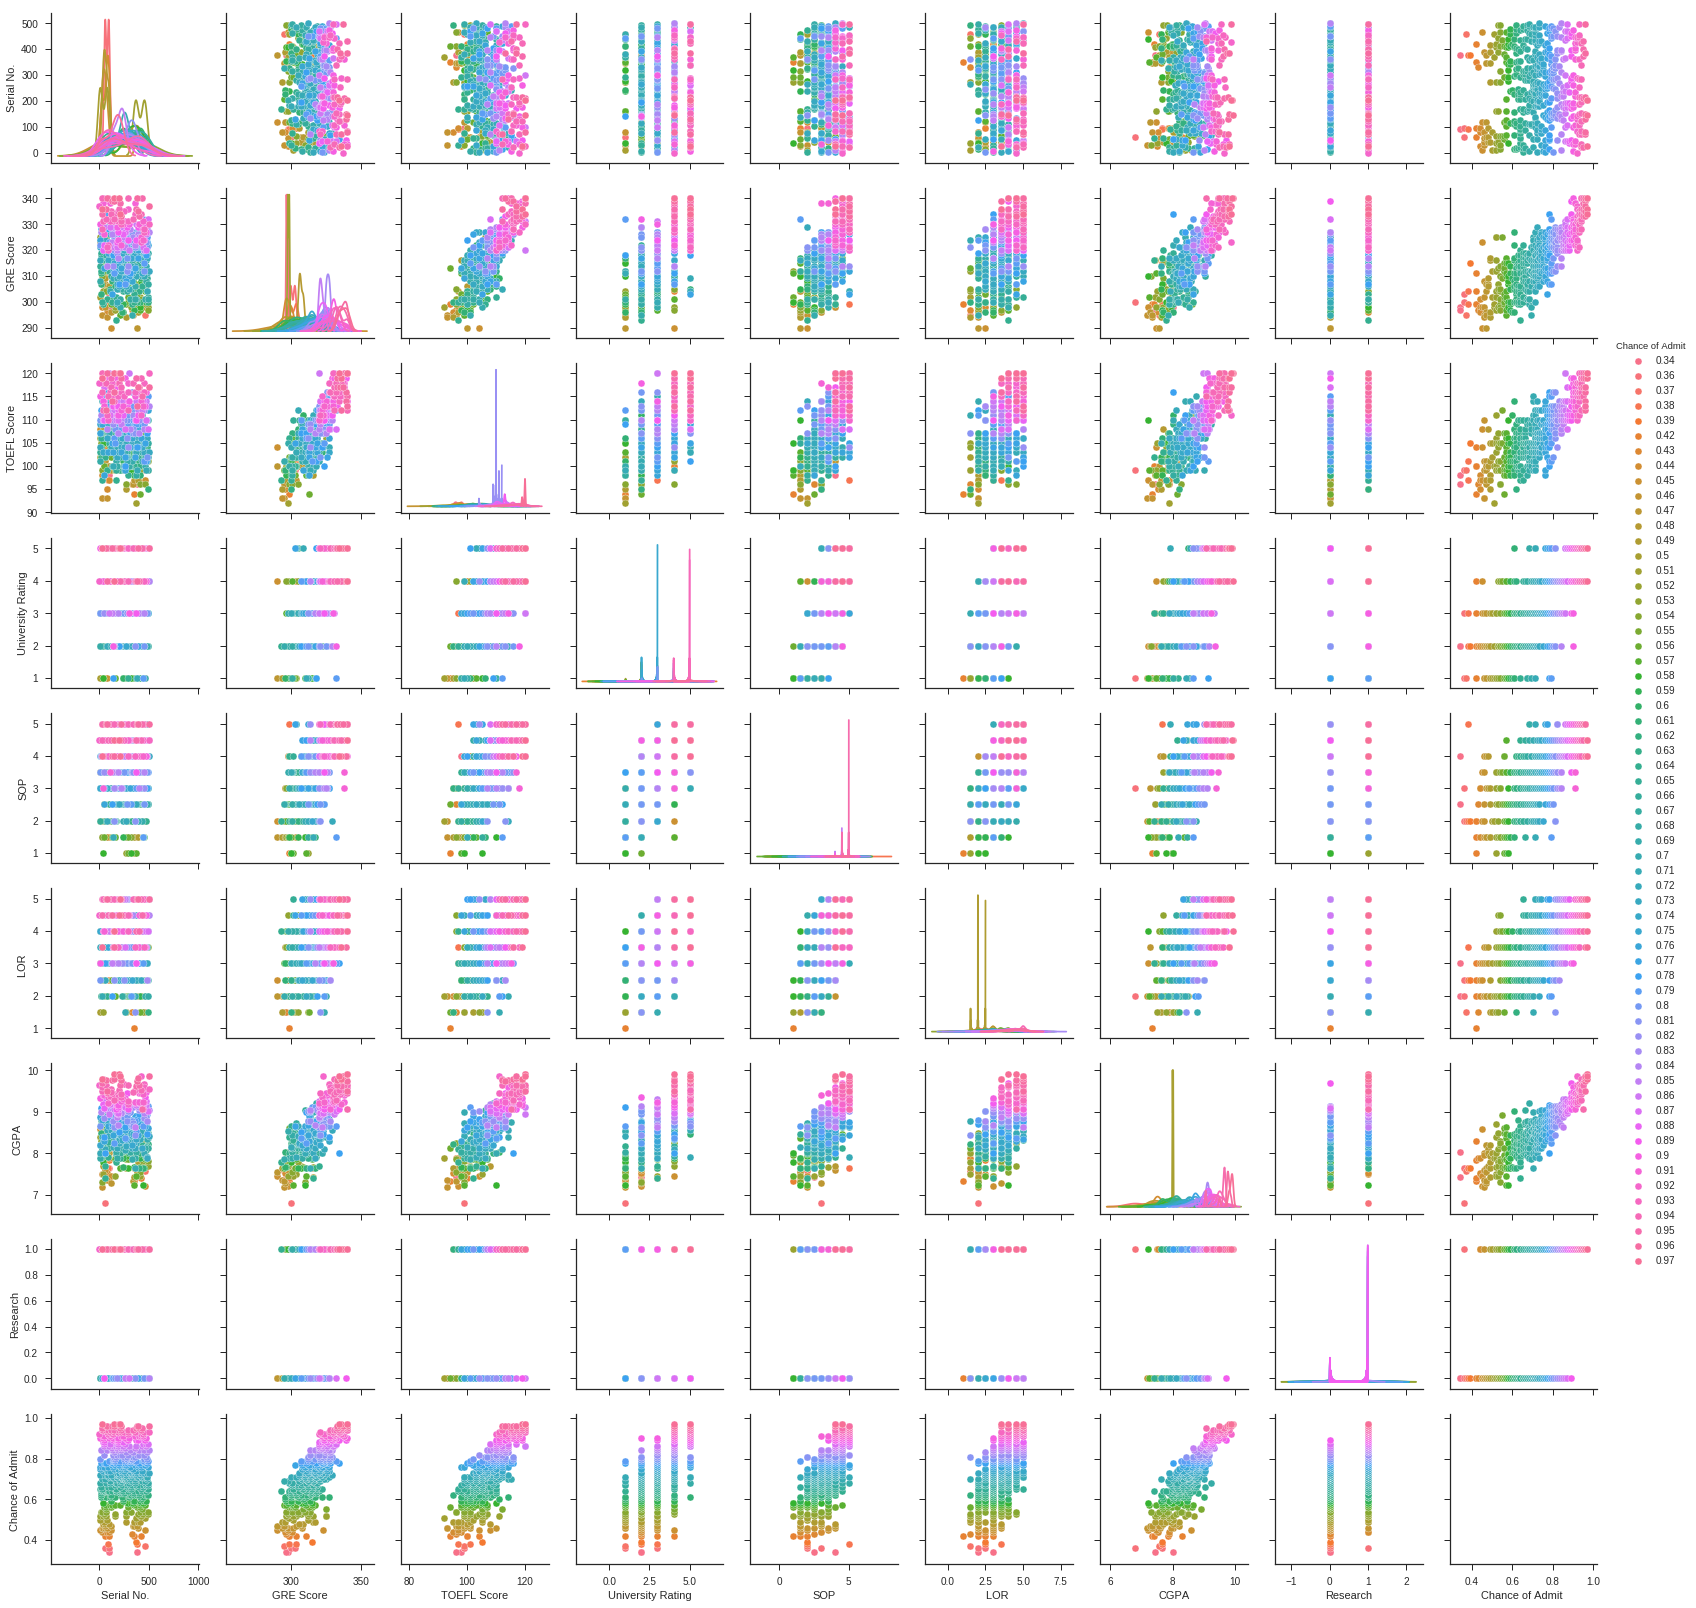

In [112]:
sns.set(style="ticks", color_codes=True)
_= sns.pairplot(df,hue="Chance of Admit " ,diag_kind="kde")


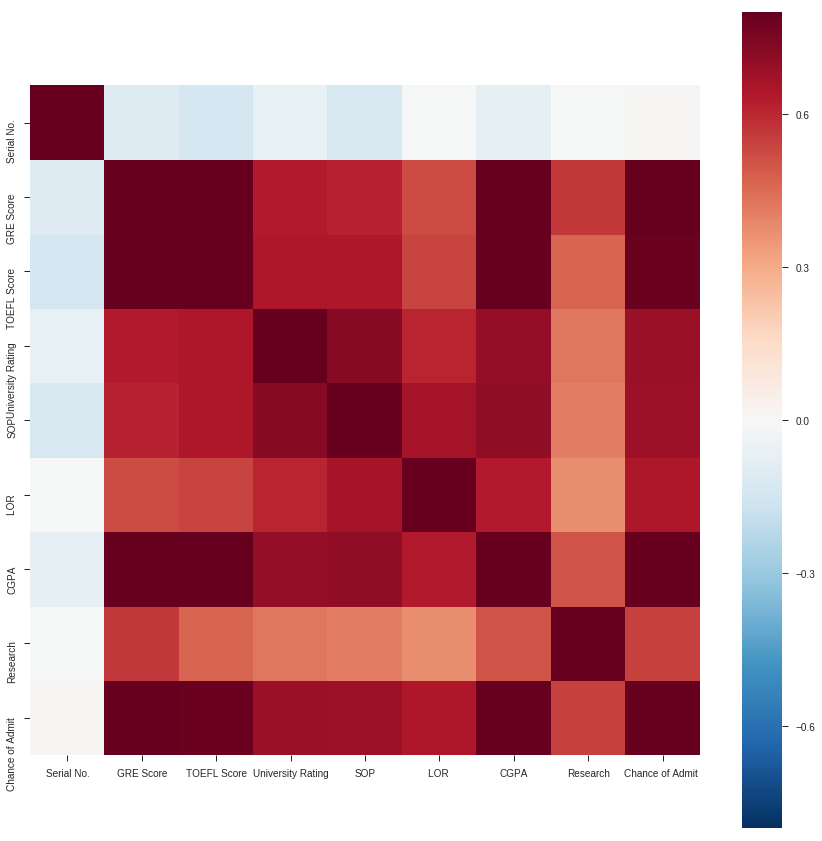

In [125]:
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [143]:



y=df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

AttributeError: ignored

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [138]:
predictions[0:5]

array([0.82, 0.81, 0.47, 0.93, 0.53])

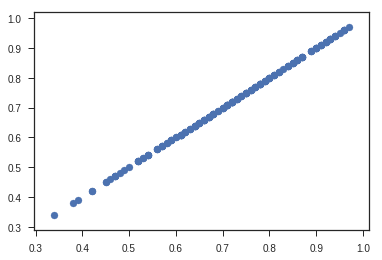

In [139]:
plt.scatter(y_test, predictions)


In [140]:
accuracy = lm.score(X_test,y_test)
print(accuracy*100,'%')

100.0 %
